# 1. Business Metrics

In most — if not all — institutions, `management keeps track of the overall health of the business through the result of measurements called` **metrics**.

A ubiquitous and familiar example of a metric is **revenue**. In retail, a very popular metric is the **[average order value](https://www.optimizely.com/optimization-glossary/average-order-value); `and in subscription-based products, churn rate is crucial.`**

`Examples of metrics that are followed by governments are GDP, inflation, and unemployment rate — which we saw earlier.`

One thing that's important to understand: `Metrics are observed across time. Metrics are calculated separately at specific points in time, but are understood in a chronological context`.

`Common time frames in which to calculate metrics are days, weeks, or months. `**`Which time frame to use depends on factors like importance, data availability, and how dynamic the metric is`**.

# 2. What's a Good Metric?

**`A good metric should have the following characteristics`**:

**Accurate**

It should go without saying that metrics should be accurate. Remember how, in the last mission ,we abandoned the estimation of the impact of the project because we couldn't properly measure it? By the same token, if a concept can't be adequately measured, then it shouldn't be a metric.

**Simple and intelligible**

Metrics are meant to be read and understood at a glance. Metrics are often presented in the context of a dashboard or report containing other metrics. There is much to read and understand, so it should be easy to read each of the dashboard's components. Think of metrics as the headline to a story.

Because metrics are often divulged to broad audiences, they should be targeted to a common denominator.

**Easy to drill down into**

Metrics are meant to monitor how a business is doing. Sometimes they will reveal that something is going exceptionally well, or exceptionally bad. In either case we will be interested in knowing what factors contributed to the change in the metric. In other words, metrics are headlines, you need to be able to read the story.

Since metrics typically are comprised of components (for example, profits can be seen has having two components: revenue and costs), we need to be able to drill down into them to understand what the change is attributed to.

**Actionable**

The point of measuring the health of the business is not just so we know if things are going well or not. The goal is to act on things if they're not going in the direction we want. For this reason, a good metric needs to be actionable.

For example, it's known that weather has an impact on sales in brick-and-mortar stores, but we can't change the weather. A better option — and one we can act on — would be to measure the relevancy of our products based on the weather.

**Dynamic**

Metrics need to be dynamic, they need to change over time. This characteristic is somewhat related to the above, but merits some distinction.

Many companies rent their offices instead of buying them. How much companies pay on leases is something that can potentially be acted on, in this sense it is actionable. However, since leases are legal contracts with relatively extended periods of time, this metric shouldn't be tracked — it's not dynamic enough.

**Standardized**

The broader the reach of a metric (in terms of its audience), the more the metric's elementary components need to be standardized, so that everyone sees the same thing. Not doing this causes inconsistency and misinformation, potentially resulting in unwanted outcomes.

To give a couple of examples:

    Should Amazon count a sale as such the moment the customer places the order? When the payment goes through? When the 
    order leavesthe warehouse? When it is delivered? Even something as simple as the concept of sale can be ambiguous.

    In supply chain management, lead time is defined as "the amount of time that passes from the start of a process until           its conclusion."

    Piggybacking from the previous example, should the lead time go up to the point where the order leaves the warehouse or until the customer receives it? Given that Amazon outsources the deliveries to companies like UPS, they don't have much control over what happens once the order is "on the road." However, from a customer satisfaction perspective, how long a customer takes to receive the order is definitely very relevant.

Conflicting definitions should be resolved when a metric is monitored by many people in the company.

**Business oriented**

A metric should be relevant for the business. Here at Dataquest, we could potentially track how many times students use the character a in their answers. But it's unlikely to have any impact on how well they learn.

Metrics need to be adjusted to the current needs of the business. Take, for instance, Netflix. They possibly tracked how much business they were losing to piracy. When streaming became easily available and relatively cheap, piracy stopped being a serious issue and there (possibly) was no need to track it anymore.

# 3. Introduction to the Net Promoter Score

* `NPS is a` [customer success](https://en.wikipedia.org/wiki/Customer_success) `metric that quantifies customer satisfaction.` You've probably been asked to fill in surveys that contained some variation of the question "How likely are you to recommend this product to a friend?" and whose possible answers were 11 numbers on a scale from 0 to 10.

**Customers who pick:**

* Anything from 0 through 6 are called detractors;
* 7 or 8 are called passives;
* 9 or 10 are called promoters;



**By proxy each of these categories are gauged as follows:**

**Detractors:** Unhappy customers who share their negative experience with the product or company; they may actively spread negative feedback.

**Passives:** Customers who may be pleased with the product, but aren't actively promoting it and will quickly turn to the competition if a better opportunity presents itself.

**Promoters:** Extremely satisfied customers who will act as brand ambassadors.

`NPS is then calculated as the percentage of promoters minus the percentage of detractors.`

# 4. Net Promoter Score

`Note that NPS can range between -100% (if everyone is a detractor) and 100% (if everyone is a promoter).`

In [1]:
import pandas as pd

df=pd.read_csv('nps.csv',parse_dates=['event_date'])
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [2]:
def categorize(score):
    if score in range(0,7):
        return 'Detractor'
    elif score in range(7,8):
        return 'Passive'
    elif score in range(9,10):
        return 'Promoter'

In [3]:
year = df["event_date"].dt.year
month = df["event_date"].dt.month
df["yearmonth"] = 100*year + month

df["category"] = df["score"].apply(categorize)

nps = df.pivot_table(index="yearmonth", columns="category", aggfunc="size")
nps["total_responses"] = nps.sum(axis="columns")
nps["nps"] = (nps["Promoter"]-nps["Detractor"])/nps["total_responses"]
nps["nps"] = (100*nps["nps"]).astype(int)
nps

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,30,48,109,15
202002,22,31,37,90,16
202003,33,19,29,81,-4
202004,36,28,44,108,7
202005,33,28,53,114,17
202006,32,27,51,110,17
202007,48,30,70,148,14
202008,40,36,71,147,21
202009,18,21,35,74,22


# 5. Analyzing NPS

Typically, `when presenting a metric, it is done so in a dashboard`, together with other relevant metrics. The following is a customer satisfaction dashboard taken fron [SlideModel.com](https://slidemodel.com/)


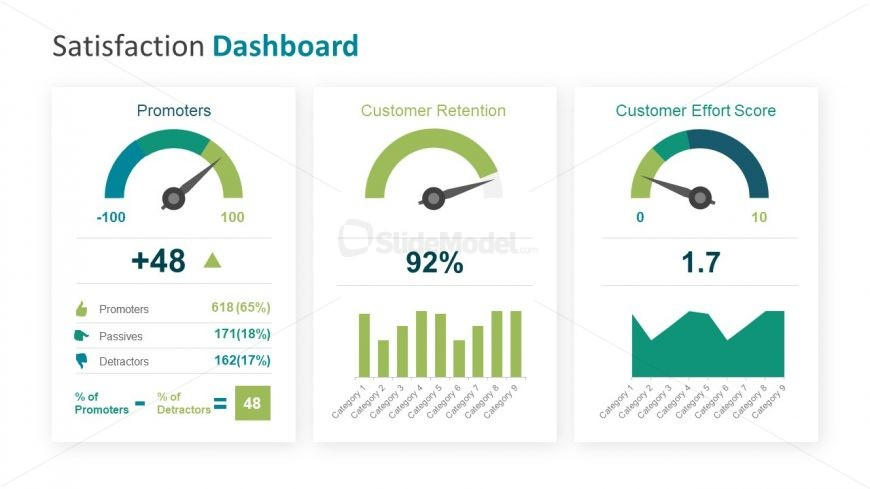

In [4]:
from IPython.display import Image
Image(filename='slidemodel.jpg')

Text(0.5, 0, '')

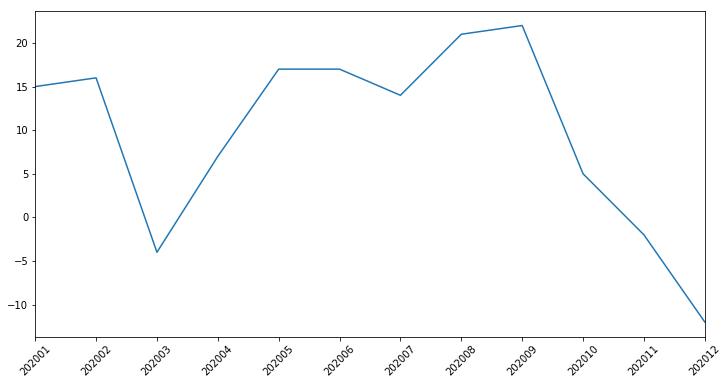

In [5]:
%matplotlib inline
ax = nps.reset_index().plot(kind="line", x="yearmonth",y="nps",
                            figsize=(12,6), legend=False
                           )
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text("")

Now suppose it is December 2020, the NPS is just above 30. We can immediately tell it is doing bad, at least in view of the last few months. What to do about this? This is where the "actionable" characteristic comes in.

If we want to improve NPS, we must improve customer satisfaction. The company can begin by surveying its customers to get feedback and gain some understanding as to what's driving this apparent insatisfaction. In fact, it's standard practice in NPS surveys to have a freeform text box where customers can share their feedback with us. Once we have this feedback, we can act upon it as see how it impacts our NPS; hopefully it will improve it.

Every metric has its pros and cons. It may seem like NPS is too simplistic a model to be useful, but it is in fact positively correlated with business growth. Fred Reichheld, a business strategist, even called it "the one number you need to grow".

**Cons include**:

* Requiring feedback from customers for it to be actionable — and most customers don't give feedback.
* It doesn't account for the influence of each respondent, or the influence of each category of respondents. Perhaps unsatisfied customers are more likely to voice their unhappiness on social media than promoters are to voice how happy they are, for instance.


# 6. Customer Churn

Simply put, `when a customer stops being a customer, we say the customer has churned.`

`Churn rate is the percentage of customers that churned in a given time period.
`
$\dfrac{\# \text{ Churned customers}}{\# \text{ Total customers}}$

You purchased your local gym from its previous owners. It was a great deal as their mismanagement led the owners to decide that the business wasn't profitable; you as a customer and entrepreneur were able to see the unfulfilled potential.

In January of 2013, the transaction was complete and you immediately took the opportunity to make a New Year's Resolution promo where people could sign up for the whole year and pay $500 instead of $50 per month. You also renamed the gym as Muscle Labs — not only are you fit, you also are a creative genius.

You decided to use the traditional subscription model used in gyms where customers pay an installment per month to access the gym. A customer churns when they elect not to pay the installment — this makes our life easier in implementing the concept for churn.

In [6]:
subs=pd.read_csv('muscle_labs.csv',parse_dates=['end_date','start_date'])

subs['churn_month']=subs['end_date'].dt.year*100+subs['end_date'].dt.month

monthly_churn=pd.DataFrame({'total_churned':subs.groupby('churn_month').size()})
monthly_churn

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37
201108,40
201109,39
201110,47
201111,45


# 7. Date Wrangling

Note that because of the way we created monthly_churn, it can only contain months in which customers have churned — it could potentially be missing a few months. Let's inspect the start_date column in subs to figure out what is the earliest month we have data in.

In [7]:
print(subs["start_date"].min())

2011-01-05 13:55:00


You may have noticed that our data in monthly_churn starts at March 2011. Given the above result, we conclude that we're missing at least two months

Let's create a dataframe with a column that accounts for all the relevant months:

In [8]:
years = list(range(2011,2015))
months = list(range(1,13))
yearmonths = [y*100+m for y in years for m in months]
print(yearmonths)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [9]:
yearmonths = yearmonths[:-1]

churn = pd.DataFrame({"yearmonth": yearmonths})
churn = pd.merge(churn, monthly_churn, "left", left_on="yearmonth", right_index=True)
churn.fillna(0, inplace=True)
churn["total_churned"] = churn["total_churned"].astype(int)
churn

,yearmonth,total_churned
0,201101,0
1,201102,0
2,201103,8
3,201104,16
4,201105,29
5,201106,27
6,201107,37
7,201108,40
8,201109,39
9,201110,47


# 8. Churn Rate

The number of customers can change throughout the month. Potentially even everyday, and depending on implementation details, it can change from one minute to the other. So how do we decide on the denominator? The following is a non-exhaustive list of several common options:

* The number of customers at the beginning of the time period.
* The mean between the number of customers at the beginning of the time period and at the end of the same period.
* The average throughout the time period — for example, if the chosen time frame is a week, sum the number of customers from Monday through Sunday and divide by seven.

Each definition has its pros and cons and what definition to use is something that depends on the details of the product and the business. Having said this, it's better to use any reasonable definition than be stuck on choosing the absolute best one and not move on with getting this metric.

In this scenario we'll use the the first definition: The number of churned customers divided by the number of customers at the beginning of the time period. Its simplicity bring us a couple of important advantages:

* It's easy to understand
* It's easy to drill down into

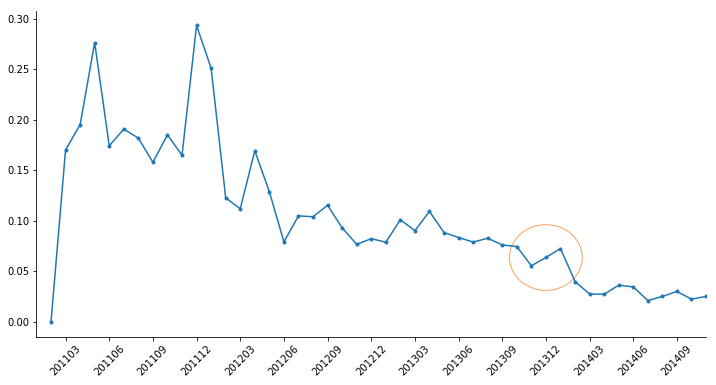

In [10]:
import datetime as dt

def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    
    return ((subs["start_date"] < date) & (date <= subs["end_date"])).sum()

churn["total_customers"] = churn["yearmonth"].apply(get_customers)
churn["churn_rate"] = churn["total_churned"] / churn["total_customers"]
churn["yearmonth"] = churn["yearmonth"].astype(str)

arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False
                   )
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()

# 9. Investigating Churn

You may have noticed a few things:

The churn rate is very erratic at the beginning;

In the months prior to you taking over the business in January of 2013, the churn rate started to become more stable.

After you took over the business, there was a spike in churn. This is not surprising, maybe people just took the opportunity to change gyms or quit.

At the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate.

A few actions that you could take to reactivate these customers are:

* Make a new promotion specifically for the quitters.
* Make a new promotion specifically for the customers who attended the gym up until the end.
* Throw in some perks in addition to the standard service for the customers who didn't quit.

# 10. Analyzing Churn

 Notice how we finished the last screen with possible actions: churn rate is actionable. Moreover, it satisfies most, if not all, of the other requirements for what makes a good metric:

* Accurate
* Simple and intelligible
* Easy to drill down into
* Actionable
* Dynamic
* Standardized
* Business oriented

It should come as no surprise that retaining your customers is important. Let's bring some clarity into this by specifying some reasons why reducing churn is important:

* The more customers you lose, the smaller the pool of potential customers becomes. Depending on the industry and kind of business, you can even run the risk of completely exhausting the pool of potential customers.
  * In the scenario we just saw, the potential pool of customers are the people that live sufficiently close to the gym. If you lose all of them, you're going to have a hard time getting customers.
* In the case of subscription based products, current customers are more likely to buy the more expensive products than new customers.
* Churn rate informs how happy customers are with your product.
* Research has shown that retaining existing customers is more profitable than acquiring new customers due primarily to savings on acquisition costs, the higher volume of service consumption, and customer referrals (source).
* Happy customers provide free advertising.
* Gauging churn rates, just like NPS, is also industry-dependent: